# Homework #1: OLS Regression

## A) Explore the data  
1. Calculate descriptive statistics (such as mean, median, max etc.) of all variables, check if the data makes sense and comment on that.  

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data = pd.read_csv("data_thefts.csv")

In [4]:
data.head()

,Unnamed: 0,robbbPerPop,pctWhite,kidsBornNevrMarr,pctKidsBornNevrMarr,pctUsePubTrans,pctBlack,pctKids2Par,pctFemDivorc,numForeignBorn,pctAllDivorc,pctForeignBorn,pct2Par,popDensity,pct12.17w2Par,persUrban,pctMaleDivorc,pctImmig.10
0,1,8.20,91.78,31,0.36,9.63,1.37,90.17,5.22,1277,4.47,10.66,91.43,1845.9,95.81,11980,3.67,3.30
1,2,21.26,95.57,43,0.24,3.84,0.80,85.33,6.45,1920,5.42,8.30,86.91,2186.7,86.46,23123,4.23,1.87
2,3,154.95,94.33,164,0.88,4.37,0.74,78.85,14.76,1468,12.55,5.00,78.54,2780.9,75.72,29344,10.10,1.78
3,4,57.86,97.35,561,3.84,3.31,1.70,62.36,14.47,339,12.91,2.04,64.02,3217.7,67.43,0,10.98,0.31
4,5,32.04,89.16,402,4.70,0.38,0.53,55.20,11.64,196,9.73,1.74,58.59,974.2,79.17,0,7.51,1.22


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2213 entries, 0 to 2212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2213 non-null   int64  
 1   robbbPerPop          2213 non-null   float64
 2   pctWhite             2213 non-null   float64
 3   kidsBornNevrMarr     2213 non-null   int64  
 4   pctKidsBornNevrMarr  2213 non-null   float64
 5   pctUsePubTrans       2213 non-null   float64
 6   pctBlack             2213 non-null   float64
 7   pctKids2Par          2213 non-null   float64
 8   pctFemDivorc         2213 non-null   float64
 9   numForeignBorn       2213 non-null   int64  
 10  pctAllDivorc         2213 non-null   float64
 11  pctForeignBorn       2213 non-null   float64
 12  pct2Par              2213 non-null   float64
 13  popDensity           2213 non-null   float64
 14  pct12.17w2Par        2213 non-null   float64
 15  persUrban            2213 non-null   i

In [3]:
data.describe()

,Unnamed: 0,robbbPerPop,pctWhite,kidsBornNevrMarr,pctKidsBornNevrMarr,pctUsePubTrans,pctBlack,pctKids2Par,pctFemDivorc,numForeignBorn,pctAllDivorc,pctForeignBorn,pct2Par,popDensity,pct12.17w2Par,persUrban,pctMaleDivorc,pctImmig.10
count,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2.213000e+03,2213.000000,2213.000000,2213.000000,2213.000000,2213.000000,2.213000e+03,2213.000000,2213.000000
mean,1107.724808,162.602576,84.009625,2107.273385,3.110474,3.040533,9.308098,71.243502,12.321871,6.151700e+03,10.809381,7.338717,74.072666,2784.390962,75.535332,4.704100e+04,9.124808,2.941735
std,639.534290,234.539147,16.396434,14610.602051,3.124172,4.914354,14.221291,12.036921,3.261881,5.511437e+04,3.000333,8.418038,10.519613,2830.122447,10.358646,2.029238e+05,2.802447,4.245034
min,1.000000,0.000000,2.680000,0.000000,0.000000,0.000000,0.000000,18.300000,3.350000,2.000000e+01,2.830000,0.180000,22.970000,10.000000,20.200000,0.000000e+00,2.130000,0.000000
25%,554.000000,27.640000,76.370000,147.000000,1.070000,0.360000,0.860000,64.020000,9.860000,4.000000e+02,8.570000,2.060000,67.940000,1181.800000,70.200000,0.000000e+00,7.110000,0.520000
50%,1108.000000,74.780000,90.350000,352.000000,2.040000,1.220000,2.860000,72.560000,12.520000,1.024000e+03,10.890000,4.310000,75.030000,2027.300000,76.920000,1.804100e+04,9.140000,1.310000
75%,1661.000000,187.160000,96.230000,1030.000000,3.900000,3.360000,11.110000,80.400000,14.730000,3.297000e+03,12.970000,9.250000,81.900000,3322.800000,82.780000,4.189100e+04,11.050000,3.440000
max,2215.000000,2264.130000,99.630000,527557.000000,27.350000,54.330000,96.670000,92.580000,23.920000,2.082931e+06,22.230000,60.400000,93.600000,44229.900000,97.340000,7.322564e+06,20.080000,32.630000


_First, I checked a few rows of the data file to see the structure. Then using data.describe I can see that data looks ok, all variables in % are within 0-100. Data are complete. However, I do not need the Unnamed column. 
?? Co udělat s daty v absolutních hodnotách??_

In [10]:
data.columns

Index(['Unnamed: 0', 'robbbPerPop', 'pctWhite', 'kidsBornNevrMarr',
       'pctKidsBornNevrMarr', 'pctUsePubTrans', 'pctBlack', 'pctKids2Par',
       'pctFemDivorc', 'numForeignBorn', 'pctAllDivorc', 'pctForeignBorn',
       'pct2Par', 'popDensity', 'pct12.17w2Par', 'persUrban', 'pctMaleDivorc',
       'pctImmig.10'],
      dtype='object')

In [11]:
columns_to_drop = ['Unnamed: 0']
data_dropped = data.drop(columns=columns_to_drop)

2. Calculate or plot the correlation matrix. Do some variables have too large correlation (say, above 70%)? 

[Text(0.5, 1.0, 'Correlation Matrix')]

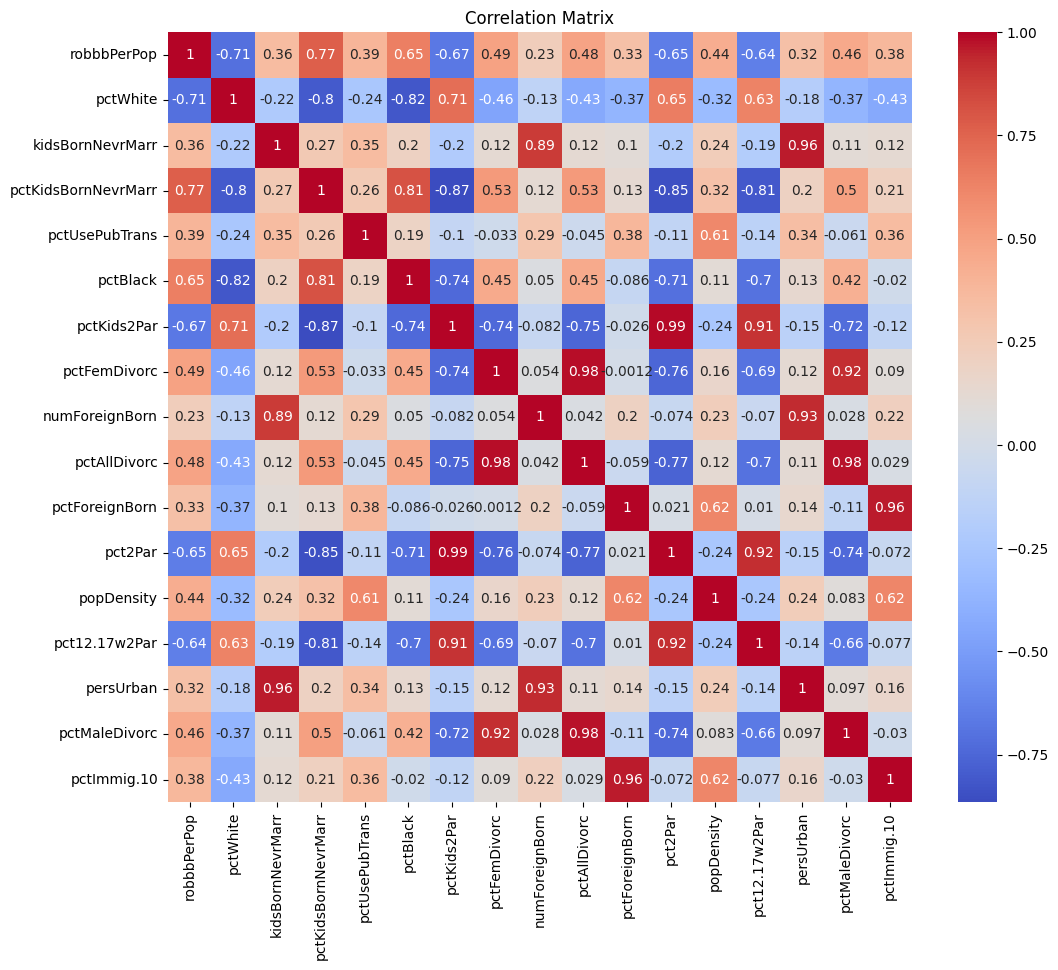

In [12]:
corr = data_dropped.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=corr, annot=True, cmap="coolwarm").set(title="Correlation Matrix")

_The following features are correlated:_
- pctWhite and pctKidsBornNevrMarr -0.8
- pct White and pctBlack -0.82
- pctWhite and pctKids2Par 0.71
- pctKidsBornNevrMarr and pctBlack 0.81
- pctKidsBornNevrMarr and pctKids2Par -0.87
- pctKidsBornNevrMarr and pct2par -0.85
- pctKidsBornNevrMarr and pct12.17w2Par -0.81
- pctBlack and pctKids2Par -0.74
- pctBlack and pct2Par -0.71
- pctBlack and pct12.17w2Par -0.7
- pctKids2Par and pctFemDivorc -0.74
- pctKids2Par and pctAllDivorc -0.75
- pctKids2Par and pct2Par 0.99
- pctKids2Par and pct12.17w2Par 0.91
- pctKids2Par and pctMaleDivorc -0.72
- pctFemDivorc and pctAllDivorc 0.98
- pct FemDivorc and pct2Par -0.76
- pctFemDivorc and pctMaleDivorc 0.92
- pctAllDivorc and pct2Par -0.77
- pctAllDivorc and pct12.17w2Par -0.7
- pctAllDivorc and pctMaleDivorc 0.98
- pctForegnBorn and pctImmig.10 0.96
- pct2Par and pct12.17w2Par 0.92
- pct2Par and pctMaleDivorc -0.74

_To sum up, there are many highly correlated variables. In the model I will have to choose only some of them._

3. Visualize the data before starting the modelling and using the plots comment on: 
- What is the distribution of your dependent variable? 
- What is the relationship between your dependent variable and some of the explanatory variables? Choose at least two variables to plot and comment on that.
- (Hint: For example, you can visualize a scatterplot that shows if with a higher population density, the number of robberies tends to increase)

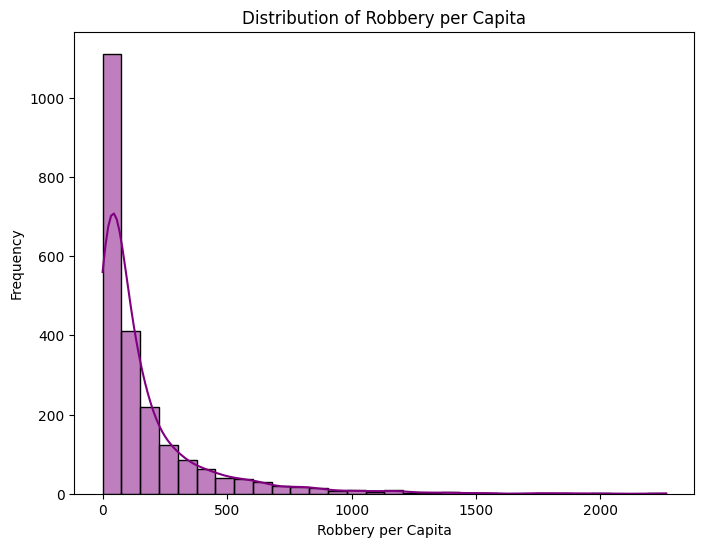

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(data_dropped["robbbPerPop"], bins=30, kde=True, color="purple")
plt.xlabel("Robbery per Capita")
plt.ylabel("Frequency")
plt.title("Distribution of Robbery per Capita")
plt.show()

_Distribution is right-skewed. Most areas have low robbery rates, but there are some areas with very high frequency of robberies._

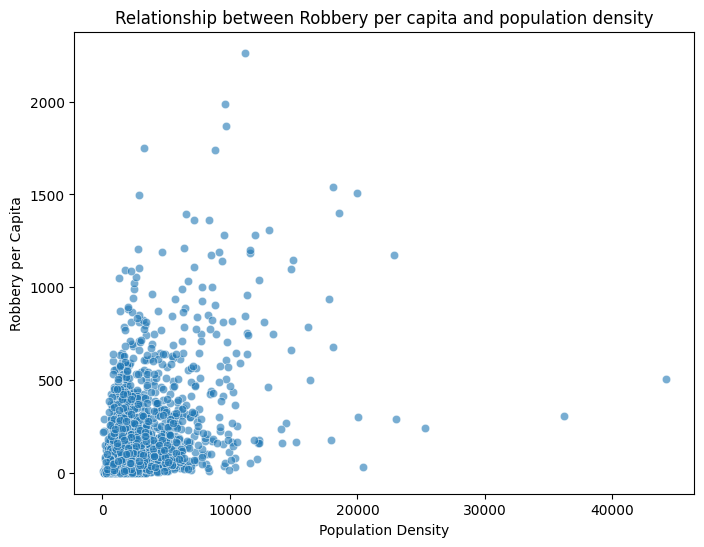

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_dropped["popDensity"], y=data_dropped["robbbPerPop"], alpha=0.6)
plt.xlabel("Population Density")
plt.ylabel("Robbery per Capita")
plt.title("Relationship between Robbery per capita and population density")
plt.show()

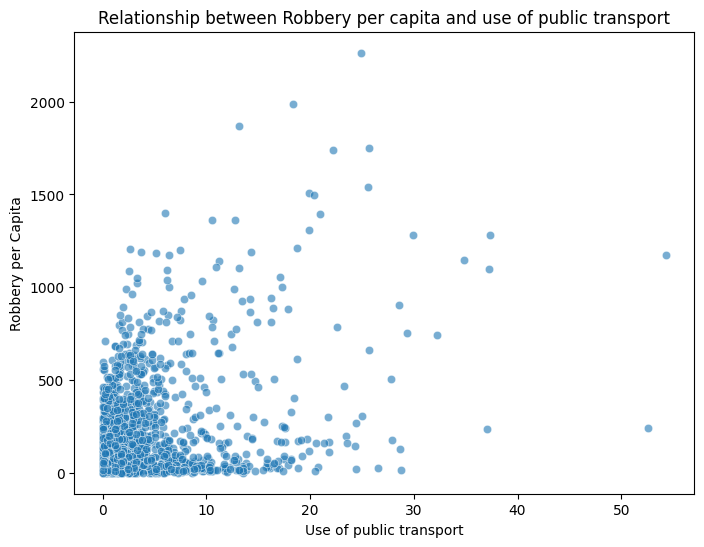

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_dropped["pctUsePubTrans"], y=data_dropped["robbbPerPop"], alpha=0.6)
plt.xlabel("Use of public transport")
plt.ylabel("Robbery per Capita")
plt.title("Relationship between Robbery per capita and use of public transport")
plt.show()

bla bla

## B) Start modelling 
Which variables would you intuitively include in the model? Select one model specification that makes sense to you. 
- Mind the correlation between variables - it might not make sense to include highly correlated variables to the model. (Hint: For example, from pctAllDivorc, pctFemDivorc, pctMaleDivorc we should rather choose just one representative.)
- Also do not forget a potential omitted variable bias – you do not want your model to include just one-two variables, it is better to select as many potentially useful variables as possible.

_I will use following variables, taking into account also their multicolinearity from task A/2:
pctBlack, pctKids2Par, pctAllDivorc, pctForeignBorn, pctUsePubTrans, popDensity._

In [19]:
data.columns

Index(['Unnamed: 0', 'robbbPerPop', 'pctWhite', 'kidsBornNevrMarr',
       'pctKidsBornNevrMarr', 'pctUsePubTrans', 'pctBlack', 'pctKids2Par',
       'pctFemDivorc', 'numForeignBorn', 'pctAllDivorc', 'pctForeignBorn',
       'pct2Par', 'popDensity', 'pct12.17w2Par', 'persUrban', 'pctMaleDivorc',
       'pctImmig.10'],
      dtype='object')

In [28]:
y = data_dropped['robbbPerPop']
X = data_dropped[['pctBlack', 'pctAllDivorc', 'pctForeignBorn', 'pctUsePubTrans', 'popDensity']]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            robbbPerPop   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     799.3
Date:                Fri, 04 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:39:47   Log-Likelihood:                -14074.
No. Observations:                2213   AIC:                         2.816e+04
Df Residuals:                    2207   BIC:                         2.819e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -236.5422     12.274    -19.

## C) Interpret the results 
Does the model make sense overall? Is it better than a model containing just a constant? 
What is the explanatory power of the model? 
Which variables are statistically significant at 5% level? 
Select three variables and try to interpret their coefficients. 


_It is not easy to find the correct variables is the Correlation matrix suggested strong multicolinearity between various ones.
Furthermore, R-squared is 0.664. I am not particularly happy with it.
On the other hand, Prob (F-statisstic) is 0.00, which is really low.
I will have to check further for multicolinearity or use different variables._

Explaining selected variables

## D) Model assumptions 
1. The homoskedasticity assumption typically does not hold. Therefore, run the model again, this time with heteroskedasticity-robust standard errors. How did it change your results (beta estimates and variable significances)? 


In [29]:
print(model.get_robustcov_results(cov_type = "HC3").summary())

                            OLS Regression Results                            
Dep. Variable:            robbbPerPop   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     213.6
Date:                Fri, 04 Apr 2025   Prob (F-statistic):          3.49e-186
Time:                        10:50:48   Log-Likelihood:                -14074.
No. Observations:                2213   AIC:                         2.816e+04
Df Residuals:                    2207   BIC:                         2.819e+04
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -236.5422     14.507    -16.

_Results did not change when running the model with heteroskedsticity-robust standard errors. This means that hetroskesticity should not bias the model's coefficietn estimates or their significance._

2. Double-check if there is no multicollinearity problem in your model by calculating variance inflation factor for each variable in the model. Was there any variable for which the VIF is too large? 

In [32]:
vif_values = []

# Get the number of independent variables
n_variables = len(X.columns)

# Loop through each independent variable and calculate VIF, then add it to the list
for i in range(n_variables):
    vif = variance_inflation_factor(X.values, i)
    vif_values.append(vif)

# Combine the VIF values with the column names to create a DataFrame
vif_df = pd.DataFrame({'Features': X.columns, 'VIF Factor': vif_values})

print(vif_df)

         Features  VIF Factor
0           const   16.998165
1        pctBlack    1.374744
2    pctAllDivorc    1.366545
3  pctForeignBorn    1.707591
4  pctUsePubTrans    1.747987
5      popDensity    2.368856


_VIF values are acceptable. I can try to address low R-squared with another variable._

## E) Further considerations

Did you spot any potential ethical concerns when doing this analysis? Can some results be misinterpreted? 
